## **1. Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils

## **2. Load Configuration**

In [2]:
config = utils.load_config()

## **3. Load Train Set**

In [3]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [4]:
# concat x_train and y_train
train_set = pd.concat([x_train, y_train], axis=1)

In [5]:
# Check concated train-set data
train_set.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,atemp,windspeed,cnt
1859,23,2,0,3,6,0,3,1,2,0.34,0.87,0.3182,0.2537,44
7302,5,4,0,11,21,0,6,0,1,0.32,0.66,0.3485,0.0000,118
17094,20,4,1,12,1,0,4,1,1,0.32,0.66,0.3485,0.0000,20
17009,16,4,1,12,12,0,0,0,2,0.38,0.82,0.3939,0.1940,417
1636,13,1,0,3,17,0,0,0,1,0.44,0.41,0.4394,0.3582,241


#### **3.1 Data Type Information**

Numerical Variables are: temp, atemp, hum, windspeed

The rest of variable is ordinal data

## **4. Helper Function/Procedure**

In [6]:
def find_outliers(feature, data) -> tuple:
    """Calculation to find and determine outliers in the dataset
    
    Params
    ------
    feature : str
        variable or feature name

    data : pd.DataFrame
        the available data to count the statistics

    Return
    ------
    data_stats : tuple
        values of statistics: 
            - quartile 0.25
            - quartile 0.75
            - iqr
            - number of outliers
            - percentage of outliers
    """

    # Calculate quantile
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)
    iqr = q3 - q1

    # Filter out data to find outliers
    lower_iqr = data[feature] < q1 - 1.5*iqr
    upper_iqr = data[feature] > q3 + 1.5*iqr

    # Count outliers and the percentage in the dataset
    outliers = len(data[lower_iqr | upper_iqr])
    outliers_pct = (outliers/len(data))*100
    
    return q1, q3, iqr, outliers, outliers_pct

In [7]:
def numerical_univariate(feature, data) -> None:
    """This is a procedude to generate boxplot and kde plot,
    along with the statistical information of a variable
    
    Parameters
    ----------
    feature : str
        The name of feature or variable that should be analyzed
    data : pd.DataFrame:
        The dataset that should be used in pandas DataFrame Format
    hue : str:
        The feature to weight the actual observation
    
    Return
    ------
    str
        if "hue" is float or 'cnt' it will return error message
    """

    # Setup matplotlib subplot and axes
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

    # Visualize kde plot and box plot with seaborn
    sns.kdeplot(x=feature, data=data, ax=axs[0])
    sns.boxplot(x=feature, data=data, ax=axs[1])

    # Add title to the figure
    fig.suptitle(f"Data Distribution for variable {feature}")

    # Adjusting suptitle space sith the plot title
    plt.subplots_adjust(top=0.9)
    
    plt.show()

    # Get Statistical Information
    q1, q3, iqr, outliers, outliers_pct = find_outliers(feature=feature, 
                                                        data=data)

    # Show the statistical information
    print(f"-------Statistics: {feature} -------\n"
          f"Mean      : {round(data[feature].mean(), 3)}\n"
          f"Median    : {round(data[feature].median(), 3)}\n"
          f"Minimum   : {data[feature].min()}\n"
          f"Maximum   : {data[feature].max()}\n"
          f"Q1 (0.25) : {round(q1, 3)}\n"
          f"Q3 (0.75) : {round(q3, 3)}\n"
          f"iqr       : {round(iqr, 3)}\n"
          f"Outliers  : {outliers} ({round(outliers_pct, 2)}%)\n")

In [8]:
def numerical_bivariate(feature, data) -> None:
    """This procedure is to find visualize the target variable ("cnt")
    with the independent variables.
    
    Parameters
    ----------
    feature : str
        The name of the feature
    
    data : pd.DataFrame
        The dataset
    """
    # Define target variable name
    target = "cnt"
    
    # Setup matplotlib subplot and axes
    fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

    # Visualize kdeplot for the first axis
    sns.kdeplot(x=feature, 
                y=target,
                cmap="Blues",
                cbar=True,
                shade=True,
                data=data, 
                ax=axs[0])

    # Visualize scatterplot for the second axis
    sns.scatterplot(x=feature, 
                    y=target, 
                    data=data, 
                    ax=axs[1])

    # Modify the figure title
    fig.suptitle(f"Bivariate Analysis for variable {feature} \n"
                 f"and target variable ('cnt')\n")

    # Adjusting suptitle space sith the plot title
    plt.subplots_adjust(top=0.75)

    # Modify visualization elements on the first axis
    axs[0].set_title(f"Kde Plot")

    # Modify visualization elements on the second axis
    axs[1].set_title(f"Scatterplot")
    
    plt.show()

In [9]:
def category_uni_bivariate(feature, data):
    """This is a precure to built visualization for categorical/ordinal data
    
    The analysis covers univaraite and bivariate analysis.
    
    Parameters
    ----------
    feature : str
        The name of the feature
    
    data : pd.DataFrame
        The dataset
    """

    # Define target variable name
    target = "cnt"
    
    # Setup matplotlib subplot and axes
    fig, axs = plt.subplots(ncols=2, sharex=True, figsize=(12, 6))

    # Visualize countplot for the first axes
    sns.countplot(x=feature, 
                  data=data, 
                  ax=axs[0])

    # Visualize countplot for the second axes
    sns.barplot(x=feature, 
                y=target,
                estimator=sum,
                ci=None,
                data=data, 
                ax=axs[1])

    # Modify visualization elements on the first axis
    axs[0].set_title(f"Unvariate Countplot for {feature}")
    axs[0].bar_label(axs[0].containers[0])

    # Modify visualization elements on the second axis
    axs[1].set_title(f"Bivariate Barplot for {feature} against target")    
    axs[1].bar_label(axs[1].containers[0])

    plt.show()

    # Get statistical information for target variable
    grouped_data = data.groupby(feature).mean()["cnt"]
    # grouped_data.rename({"cnt": "average cnt"}, axis=1, inplace=True)
    
    print(f"The average count")
    print(grouped_data)
    

## **5. Data Exploration**

### **5.1 Numerical Variable**

#### **5.1.1 Temp Variable**

Temp variable describe the temperature in celcius.

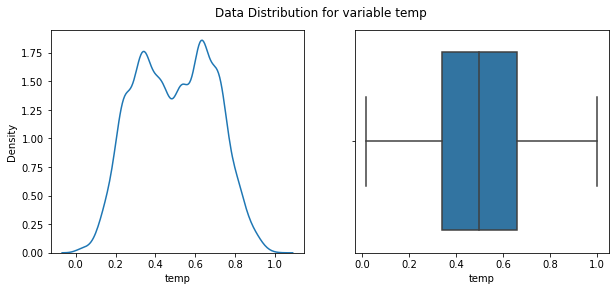

-------Statistics: temp -------
Mean      : 0.496
Median    : 0.5
Minimum   : 0.02
Maximum   : 1.0
Q1 (0.25) : 0.34
Q3 (0.75) : 0.66
iqr       : 0.32
Outliers  : 0 (0.0%)



In [10]:
# Define input varialbe name
input_var = "temp"

# Univriate Analysis
numerical_univariate(feature=input_var, data=train_set)

No outliers in the variable and the distribution similar to normal distribution

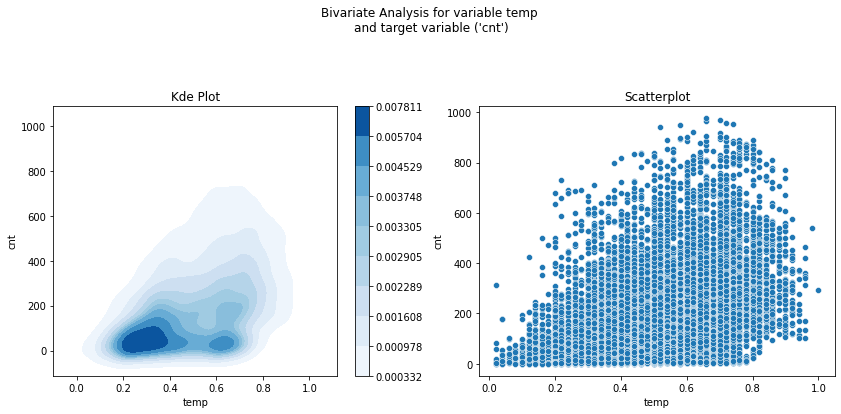

In [11]:
# Bivariate Analysis
numerical_bivariate(feature=input_var, data=train_set)

The relationship between temp variable with the target varialbe ("cnt") looks to be positive.
The most distribution of these two data are in the region of 0.007811

### **5.1.2 Atemp Variable**

atemp variable describe the normalized feeling temperature (apparent temperature) in Celcius

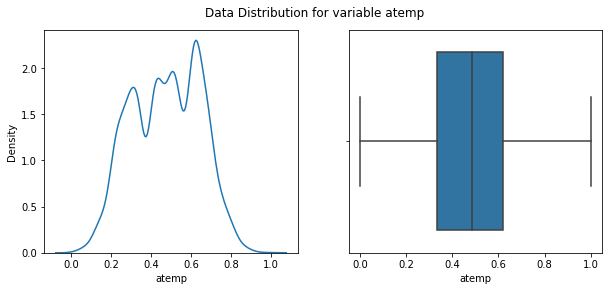

-------Statistics: atemp -------
Mean      : 0.475
Median    : 0.485
Minimum   : 0.0
Maximum   : 1.0
Q1 (0.25) : 0.333
Q3 (0.75) : 0.621
iqr       : 0.288
Outliers  : 0 (0.0%)



In [12]:
# Define input varialbe name
input_var = "atemp"

# Univriate Analysis
numerical_univariate(feature=input_var, data=train_set)

No outliers in the variable and the distribution similar to normal distribution

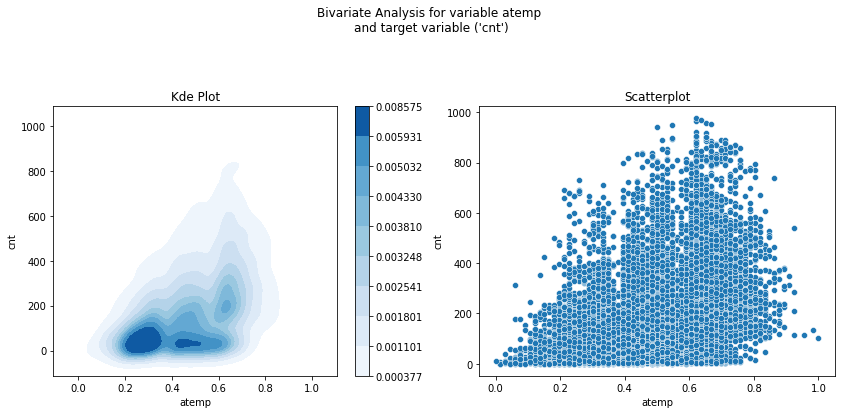

In [13]:
# Bivariate Analysis
numerical_bivariate(feature=input_var, data=train_set)

The relationship between atemp variable with the target varialbe ("cnt") looks to be positive.
The most distribution of these two data are in the region of 0.008575

### **5.1.3 hum Variable**

hum variable describe the normalized humidity divided by 100

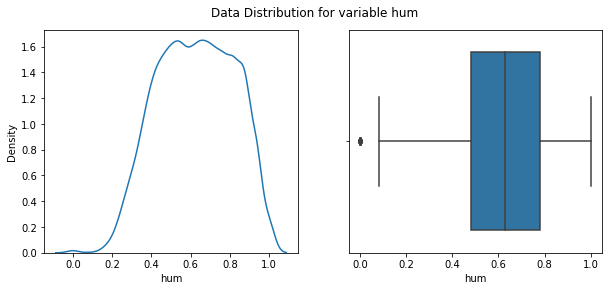

-------Statistics: hum -------
Mean      : 0.626
Median    : 0.63
Minimum   : 0.0
Maximum   : 1.0
Q1 (0.25) : 0.48
Q3 (0.75) : 0.78
iqr       : 0.3
Outliers  : 15 (0.12%)



In [14]:
# Define input varialbe name
input_var = "hum"

# Univriate Analysis
numerical_univariate(feature=input_var, data=train_set)

- There are 15 outliers value, which only contributes to 0.12% of our total data.
- from the boxplot, the outliers look not too far away.
- We shouldn't have to handle this outliers
- hum (humidity) data is distributed like normal distribution

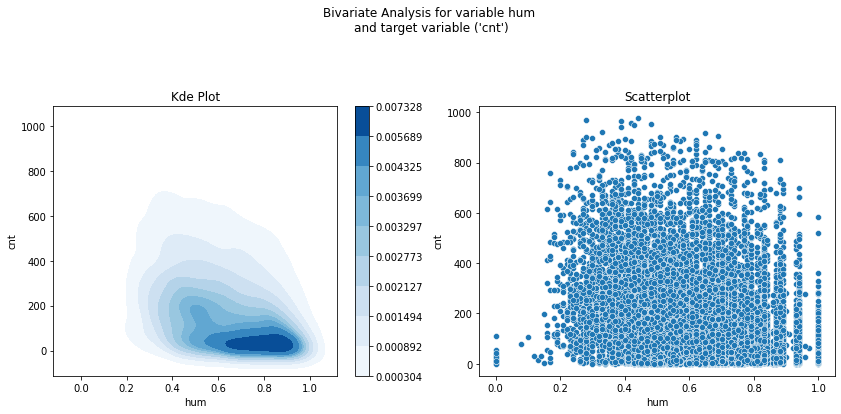

In [15]:
# Bivariate Analysis
numerical_bivariate(feature=input_var, data=train_set)

- The relationship between hum variable with the target varialbe ("cnt") looks to be positive.
- The most distribution of these two data are in the region of 0.005689 to 0.007328 

### **5.1.4 windspeed Variable**

hum variable describe the normalized windspeed

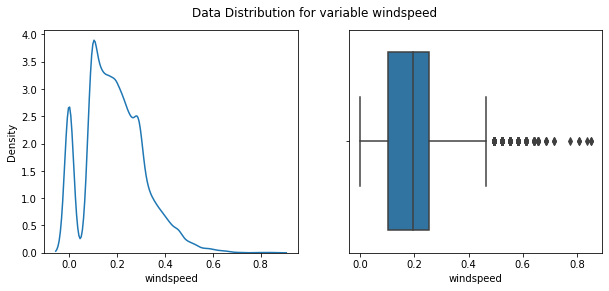

-------Statistics: windspeed -------
Mean      : 0.19
Median    : 0.194
Minimum   : 0.0
Maximum   : 0.8507
Q1 (0.25) : 0.104
Q3 (0.75) : 0.254
iqr       : 0.149
Outliers  : 243 (2.0%)



In [16]:
# Define input varialbe name
input_var = "windspeed"

# Univriate Analysis
numerical_univariate(feature=input_var, data=train_set)

- There are 243 outliers value, which contributes to the 2% of our total data.
- from the boxplot, the outliers look not quite far away.
- Outliers can be dropped.
- windspeed data is distributed like normal distribution, although there is a steep dropped around 0.02 windspeed.

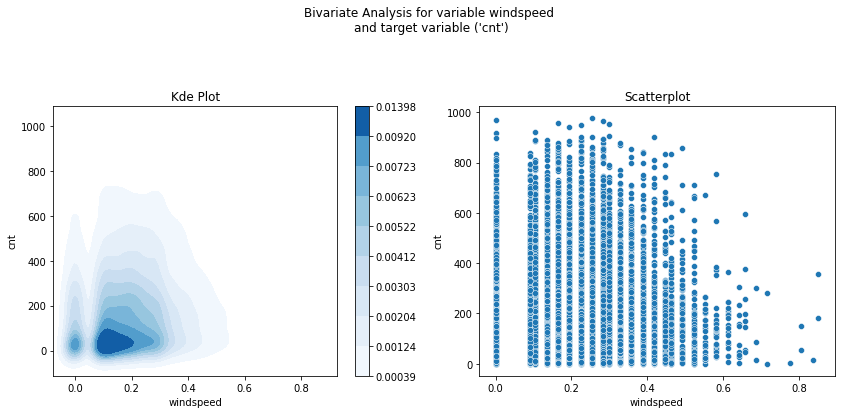

In [17]:
# Bivariate Analysis
numerical_bivariate(feature=input_var, data=train_set)

- The relationship between hum variable with the target varialbe ("cnt") looks to be positive.
- The most distribution of these two data are in the region of 0.00920 to 0.01398 

## **6. Categorical Variable**

### **6.1 Year**

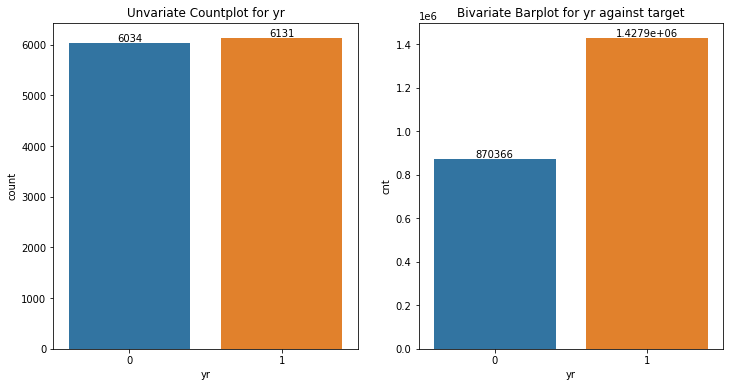

The average count
yr
0    144.243619
1    232.899201
Name: cnt, dtype: float64


In [18]:
# Define variable name
input_var = "yr"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **0 = 2011**
- **1 = 2012**

the number of years in the dataset almost similar to each other but the total of rented bike in 2012 is far better than in the 2011.

### **6.2 Month**

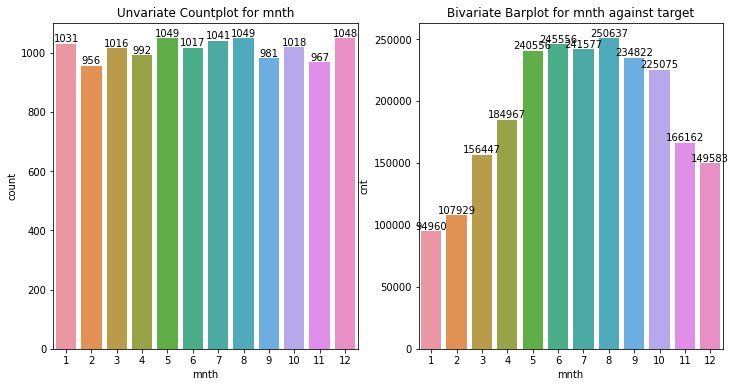

The average count
mnth
1      92.104753
2     112.896444
3     153.983268
4     186.458669
5     229.319352
6     241.451327
7     232.062440
8     238.929457
9     239.370031
10    221.095285
11    171.832472
12    142.731870
Name: cnt, dtype: float64


In [19]:
# Define variable name
input_var = "mnth"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **1 = January**
- **2 = February**
- **3 = March**
- **4 = April**
- **5 = May**
- **etc**

thorughout 2011-2012, the total number of rented bike is centered on May to October. This totally make sense since May is when the summer is started and the end of October is when the winter is kicked in 

### **6.3 Holiday**

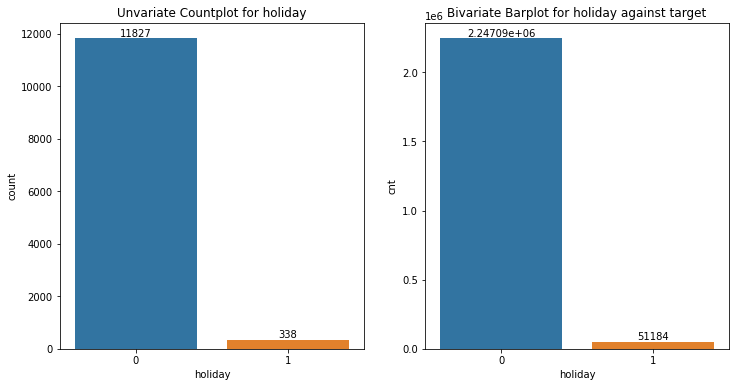

The average count
holiday
0    189.996364
1    151.431953
Name: cnt, dtype: float64


In [20]:
# Define variable name
input_var = "holiday"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **0 = Not Holiday**
- **1 = Holiday**

thorughout 2011-2012, the total number of rented bike is during holiday, which indicates that people rent bike not for leisure purposes, perhaps for business related matter such as going to work, etc.

### **6.4 Weekday**

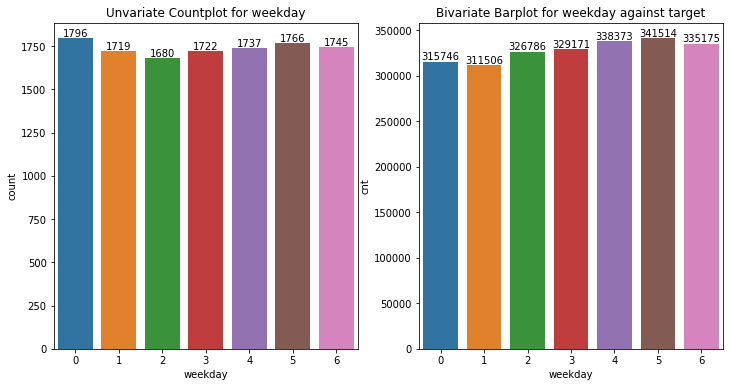

The average count
weekday
0    175.805122
1    181.213496
2    194.515476
3    191.156214
4    194.803109
5    193.382786
6    192.077364
Name: cnt, dtype: float64


In [21]:
# Define variable name
input_var = "weekday"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **0 = Sunday**
- **1 = Monday**
- **2 = Tuesday**
- **3 = Wednesday**
- **4 = Thrusday**
- **5 = Friday**
- **6 = Sunday**

thorughout 2011-2012, the total number of rented bike is shared almost equally between days, there is no weekdays that is standout throughout period.

### **6.5 Working Day**

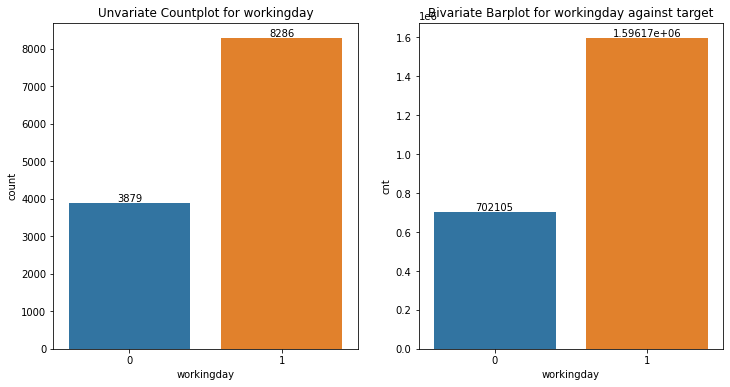

The average count
workingday
0    181.001547
1    192.634082
Name: cnt, dtype: float64


In [22]:
# Define variable name
input_var = "workingday"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **0 = otherwise (holiday)**
- **1 = If day neiter weekend nor holiday**

thorughout 2011-2012, the total number of rented bike is higher during holiday (weekend + holiday). This supports the previous insights about rented bike during not a holiday.

### **6.6 Weathersit**

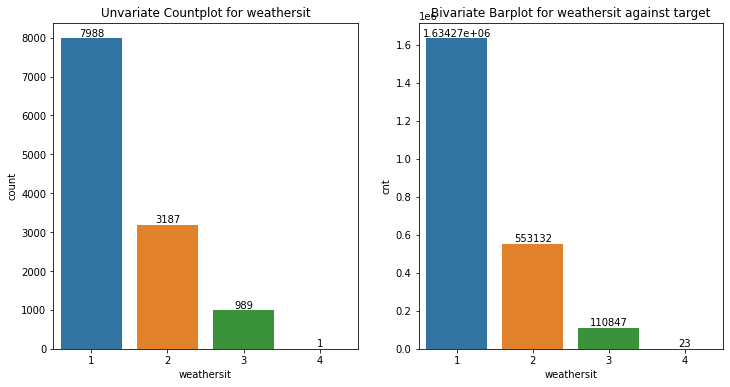

The average count
weathersit
1    204.590511
2    173.558833
3    112.079879
4     23.000000
Name: cnt, dtype: float64


In [23]:
# Define variable name
input_var = "weathersit"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **1 = Clear**
- **2 = Mist**
- **3 = Light Snow, Light Rain**
- **4 = Heavy Rain**

thorughout 2011-2012, the total number of rented bike is higher during clear whether, followed by Mist. During rain or show people are less likely to rent bike. 

### **6.7 Season**

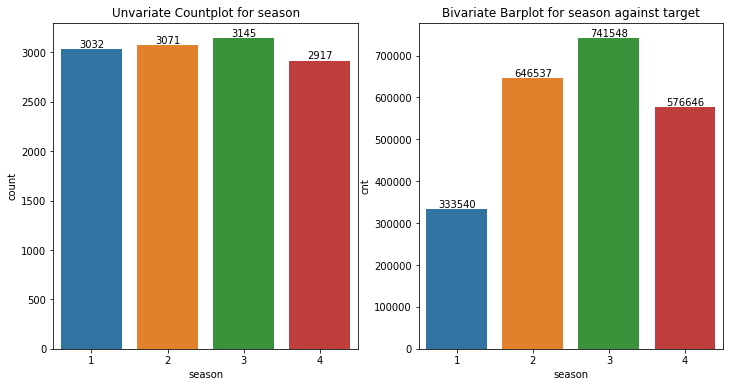

The average count
season
1    110.006596
2    210.529795
3    235.786328
4    197.684607
Name: cnt, dtype: float64


In [24]:
# Define variable name
input_var = "season"

category_uni_bivariate(feature=input_var, data=train_set)

**Notes:**
- **1 = Winter**
- **2 = Spring**
- **3 = Summer**
- **4 = Fall**

thorughout 2011-2012, the total number of rented bike is higher Summer and Spring, which correlates with the weather where clear and cloudy (misty) wheather occurs.

### 6.8 Correlation Map

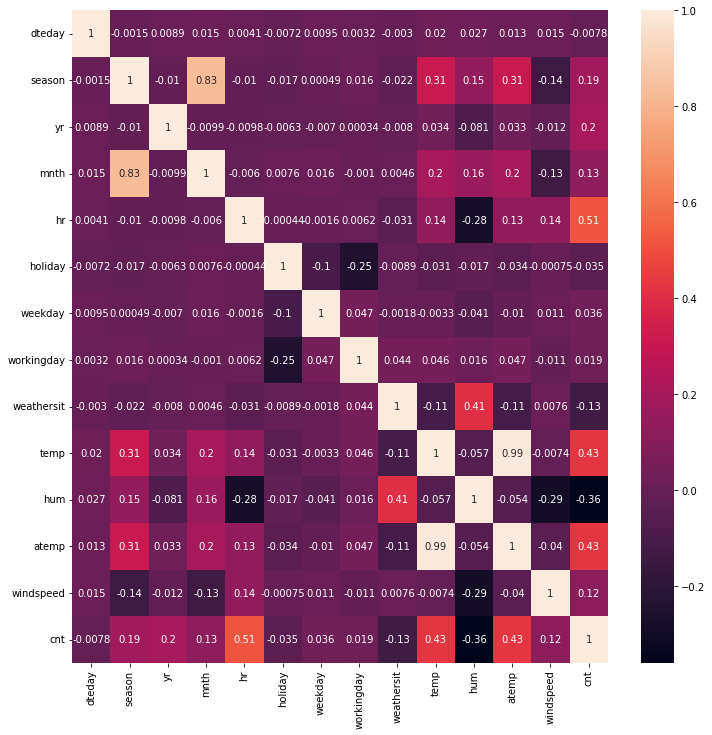

In [25]:
# Correlation
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train_set.corr(method="spearman"), annot=True, ax=ax)
plt.show()

There is a high correlation between these variables:
- temp >< atemp

This could cause multicollinearity, hence we need to drop one of these variables. Here, we decide to drop the atemp variable because atemp is more complex calculation than temp. Also, people often use temp to measure temperature compared to atemp.

### 7. Takeaways

From the EDA there are few things that should be done in the pre-processing & feature engineering process:
1. We need to handle the outliers in these variables: windspeed and humidity
2. We need to drop the atemp variable because it has high correlation with the temp variable.